######## Status Log: 

1. Have to check coverage of essential words in different algos. 
2. try doing 4 algos atleast. 
3. finalize corpus. 
4. Do clustering after selecting one algo. 


In [48]:
import pandas as pd
Speech_df = pd.read_pickle('/content/drive/My Drive/Projects/Capstone Project/Final Personal Capstone/Speech_df.pkl')

In [49]:
import nltk
nltk.download('punkt')
  

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [50]:
from nltk.tokenize import word_tokenize 
final_sentence= []

for line in Speech_df.Speech_clean:
  word_tokens = word_tokenize(line)
 
  final_sentence.append(word_tokens)
  
Speech_df['Speech_tokenized'] = final_sentence

In [52]:
Speech_df

,Finance_Minister,Date,Speech,Speech_clean,Speech_tokenized
0,Pranab Mukherjee,"February 26, 2010","In 2009, when I presented the interim Budget i...",interim regular economy grave uncertainties Gr...,"[interim, regular, economy, grave, uncertainti..."
1,Pranab Mukherjee,"February 26, 2010","2. It was not clear to us, as also to...",us policy makers many countries crisis eventua...,"[us, policy, makers, many, countries, crisis, ..."
2,Pranab Mukherjee,"February 26, 2010","3. At home, there was added uncertain...",At home added uncertainty account delayed sub ...,"[At, home, added, uncertainty, account, delaye..."
3,Pranab Mukherjee,"February 26, 2010","4. Today, as I stand before you, I ca...",stand say confidence weathered crises well eco...,"[stand, say, confidence, weathered, crises, we..."
4,Pranab Mukherjee,"February 26, 2010",5. The three challenges and the mediu...,three challenges medium term perspective outli...,"[three, challenges, medium, term, perspective,..."
...,...,...,...,...,...
272,Nirmala Sitharaman,"July, 5, 2019","(a) Food items such as chikki, chutney powder ...",Food items chikki chutney powder b Fly ash fly...,"[Food, items, chikki, chutney, powder, b, Fly,..."
273,Nirmala Sitharaman,"July, 5, 2019","(a) Walnuts, tamarind dried, roasted gram, man...",Walnuts tamarind dried roasted gram mangoes sl...,"[Walnuts, tamarind, dried, roasted, gram, mang..."
274,Nirmala Sitharaman,"July, 5, 2019",(a) Rough industrial diamonds including unsort...,Rough industrial diamonds including unsorted r...,"[Rough, industrial, diamonds, including, unsor..."
276,Nirmala Sitharaman,"July, 5, 2019",(a) Services by way of admission to entertainm...,Services way admission entertainment events am...,"[Services, way, admission, entertainment, even..."


# LBSA - Lexicon-based Sentiment Analysis

Here, I've chosen 4 lexicon based dictionaries: TextBlob, Afinn, NRC, vadar. We will check the coverage of each dictionaries to the datasets we have. 

1. TextBlob: 

In [11]:
values=[]
coverage=pd.DataFrame(values, columns= ['Speech','Total_Words', 'TextBlob', 'AFINN', 'VADER'])


coverage

,Speech,Total_Words,TextBlob,AFINN,VADER


In [23]:
grouped_df = Speech_df.groupby(['Date'])


for key, speech in grouped_df:
    print(grouped_df.get_group(key), "\n\n")

     Finance_Minister  ...                                       Speech_clean
0    Pranab Mukherjee  ...  interim regular economy grave uncertainties Gr...
1    Pranab Mukherjee  ...  us policy makers many countries crisis eventua...
2    Pranab Mukherjee  ...  At home added uncertainty account delayed sub ...
3    Pranab Mukherjee  ...  stand say confidence weathered crises well eco...
4    Pranab Mukherjee  ...  three challenges medium term perspective outli...
..                ...  ...                                                ...
276  Pranab Mukherjee  ...  My proposals Direct Taxes estimated result rev...
277  Pranab Mukherjee  ...  emerged global slowdown faster nation hesitate...
278  Pranab Mukherjee  ...  belongs Aam Aadmi belongs farmer agriculturist...
279  Pranab Mukherjee  ...                                            commend
280  Pranab Mukherjee  ...               Link https gov budget archive ub htm

[280 rows x 4 columns] 


     Finance_Minister  ...           

In [70]:
set(Speech_df.Date).pop()

'February  26,  2010'

In [63]:
Speech_df.iloc[0]

Finance_Minister                                     Pranab Mukherjee
Date                                              February  26,  2010
Speech              In 2009, when I presented the interim Budget i...
Speech_clean        interim regular economy grave uncertainties Gr...
Speech_tokenized    [interim, regular, economy, grave, uncertainti...
Name: 0, dtype: object

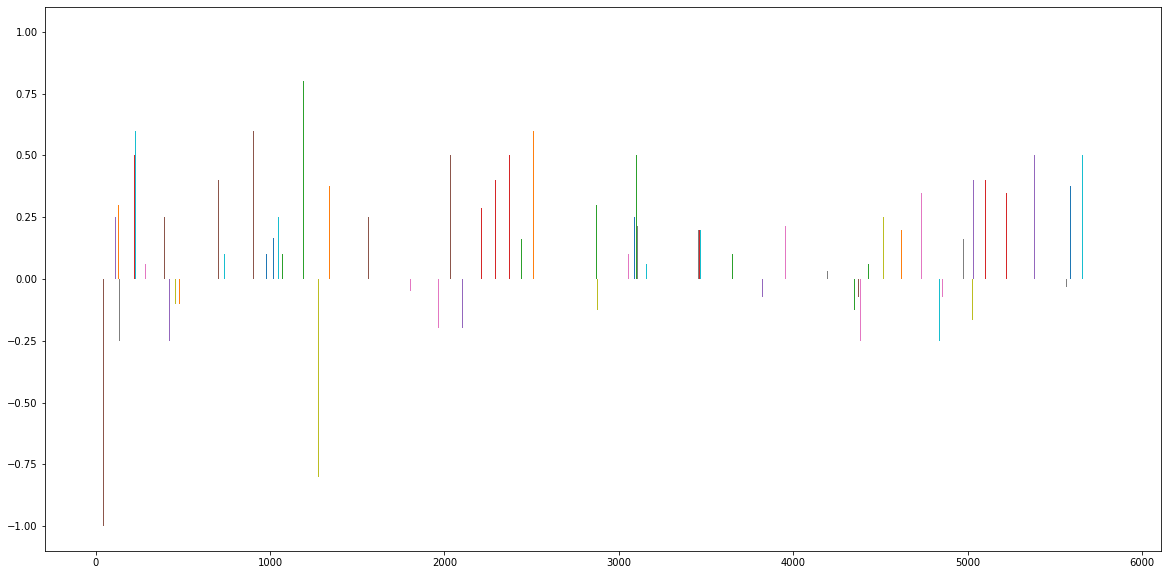

In [71]:
##Using TextBlob package:

### Considering first speech only and looking at the words which are taking polarity and the ones which are not. 
from textblob import TextBlob
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10
import matplotlib.pyplot as plt

####defining coverage dataframe


k = 0
Positive_dict = {}
Negative_dict = {}
ZeroPolarity_dict = {}

for line in Speech_df.iloc:
  if line.Date == set(Speech_df.Date).pop():
    
    for word in line.Speech_tokenized:
      if TextBlob(word.lower()).sentiment.polarity > 0:
        #print(word.lower(),TextBlob(word.lower()).sentiment.polarity)
        Positive_dict.update({word:TextBlob(word.lower()).sentiment.polarity} )

      if TextBlob(word.lower()).sentiment.polarity < 0:
        Negative_dict.update({word:TextBlob(word.lower()).sentiment.polarity} )
    
      if TextBlob(word.lower()).sentiment.polarity == 0:
        ZeroPolarity_dict.update({word:TextBlob(word.lower()).sentiment.polarity} )
     
   
      plt.bar(k, TextBlob(word.lower()).sentiment.polarity)
      k = k + 1
    #else: 
     #   ZeroPolarity_list.append(word.lower())
        #print(word.lower(),TextBlob(word.lower()).sentiment.polarity)
#pc_txtblob=(len(Positive_dict)+len(Negative_dict))/len(data.Speeches[0])




In [78]:
print("Words with polarity =", len(Positive_dict)+len(Negative_dict), "\nWords with no polarity=",len(ZeroPolarity_dict))

Words with polarity = 179 
Words with no polarity= 2303


In [87]:
ZeroPolarity_dict.keys()
#from collections import Counter
#Counter(ZeroPolarity_list).most_common()

dict_keys(['interim', 'regular', 'economy', 'grave', 'uncertainties', 'Growth', 'started', 'decelerating', 'business', 'sentiment', 'capacity', 'sustain', 'growth', 'threat', 'widespread', 'slowdown', 'world', 'us', 'policy', 'makers', 'countries', 'crisis', 'eventually', 'unfold', 'What', 'impact', 'momentum', 'soon', 'turnaround', 'fortunes', 'short', 'term', 'global', 'outlook', 'consensus', 'face', 'brunt', 'across', 'At', 'home', 'added', 'uncertainty', 'account', 'delayed', 'sub', 'south', 'west', 'monsoon', 'undermined', 'crop', 'country', 'There', 'concerns', 'production', 'prices', 'food', 'items', 'possible', 'repercussions', 'rural', 'demand', 'stand', 'say', 'confidence', 'weathered', 'crises', 'well', 'position', 'That', 'challenges', 'nine', 'months', 'UPA', 'leadership', 'elected', 'back', 'power', 'formed', 'second', 'three', 'medium', 'perspective', 'outlined', 'even', 'These', 'continue', 'engage', 'planners', 'next', 'challenge', 'revert', 'GDP', 'path', 'find', 'cro

As we can see a few of these top words looks to be important and need to have polarity. To these, we will be manually assigning a polarity value. 

Before doing that, lets check the coverage of each algorithm.


In [91]:
coverage=pd.DataFrame(columns= ['Total_Words', 'TextBlob', 'AFINN', 'VADER'])

['interim',
 'regular',
 'economy',
 'grave',
 'uncertainties',
 'Growth',
 'started',
 'decelerating',
 'business',
 'sentiment',
 'weak',
 'economy',
 'capacity',
 'sustain',
 'high',
 'growth',
 'serious',
 'threat',
 'widespread',
 'economic',
 'slowdown',
 'developed',
 'world']

In [98]:
afinnfile = open("/content/drive/My Drive/Projects/Capstone Project/AFINN-111.txt")
afinn_dict = {} # initialize an empty dictionary
for line in afinnfile:
  term, score  = line.split("\t")  # The file is tab-delimited. "\t" means "tab character"
  afinn_dict[term] = int(score)  # Convert the score to an integer.

print(afinn_dict.items()) # Print every (term, score) pair in the dictionary


dict_items([('abandon', -2), ('abandoned', -2), ('abandons', -2), ('abducted', -2), ('abduction', -2), ('abductions', -2), ('abhor', -3), ('abhorred', -3), ('abhorrent', -3), ('abhors', -3), ('abilities', 2), ('ability', 2), ('aboard', 1), ('absentee', -1), ('absentees', -1), ('absolve', 2), ('absolved', 2), ('absolves', 2), ('absolving', 2), ('absorbed', 1), ('abuse', -3), ('abused', -3), ('abuses', -3), ('abusive', -3), ('accept', 1), ('accepted', 1), ('accepting', 1), ('accepts', 1), ('accident', -2), ('accidental', -2), ('accidentally', -2), ('accidents', -2), ('accomplish', 2), ('accomplished', 2), ('accomplishes', 2), ('accusation', -2), ('accusations', -2), ('accuse', -2), ('accused', -2), ('accuses', -2), ('accusing', -2), ('ache', -2), ('achievable', 1), ('aching', -2), ('acquit', 2), ('acquits', 2), ('acquitted', 2), ('acquitting', 2), ('acrimonious', -3), ('active', 1), ('adequate', 1), ('admire', 3), ('admired', 3), ('admires', 3), ('admiring', 3), ('admit', -1), ('admits',

In [100]:

##checking coverage to each algo

from textblob import TextBlob
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10


k = 0
All_zeropolarity ={'word': 'polarity'}
while k < len(Speech_df.Speech_clean):
  Positive_dict = {}
  Negative_dict = {}
  ZeroPolarity_dict = {}
  
#####TextBlob

  for word in Speech_df.Speech_tokenized.iloc[k]:
    if TextBlob(word.lower()).sentiment.polarity > 0:
        #print(word.lower(),TextBlob(word.lower()).sentiment.polarity)
      Positive_dict.update({word:TextBlob(word.lower()).sentiment.polarity} )

    if TextBlob(word.lower()).sentiment.polarity < 0:
      Negative_dict.update({word:TextBlob(word.lower()).sentiment.polarity} )
    
    if TextBlob(word.lower()).sentiment.polarity == 0:
      ZeroPolarity_dict.update({word:TextBlob(word.lower()).sentiment.polarity} )
  
  pc_txtblob=(len(Positive_dict)+len(Negative_dict))/len(Speech_df.Speech_tokenized.iloc[k])
  All_zeropolarity = {**All_zeropolarity, **ZeroPolarity_dict}   
    #plt.bar(k, TextBlob(word.lower()).sentiment.polarity)
   # k = k + 1
    #else: 
     #   ZeroPolarity_list.append(word.lower())
        #print(word.lower(),TextBlob(word.lower()).sentiment.polarity)

#######VADER#########

  Positive_dict = {}
  Negative_dict = {}
  ZeroPolarity_dict = {}

  for word in Speech_df.Speech_tokenized.iloc[k]:
    if analyser.polarity_scores(word.lower())['neg'] !=0: 
        #print(word.lower(),TextBlob(word.lower()).sentiment.polarity)
      Negative_dict.update({word.lower():analyser.polarity_scores(word.lower())['compound']})
    if (analyser.polarity_scores(word.lower())['pos'] != 0):
      Positive_dict.update({word.lower():analyser.polarity_scores(word.lower())['compound']})

    if (analyser.polarity_scores(word.lower())['neu'] != 0):
      ZeroPolarity_dict.update({word.lower():analyser.polarity_scores(word.lower())['compound']})
    #k = k + 1
    
       # plt.bar(k, TextBlob(word.lower()).sentiment.polarity)
        
  pc_vader=(len(Positive_dict)+len(Negative_dict))/len(Speech_df.Speech_tokenized.iloc[k]) 
  All_zeropolarity = {**All_zeropolarity, **ZeroPolarity_dict}


###AFINN####


  Positive_dict = {}
  Negative_dict = {}
  ZeroPolarity_dict = {}

  uncateg= []

  for word in Speech_df.Speech_tokenized.iloc[k]:

    for check in afinn_dict:
      if (check == word):
        if afinn_dict[check] > 0: ##positive word
          Positive_dict.update({check : afinn_dict[check] })
        if afinn_dict[check] < 0:
          Negative_dict.update({check : afinn_dict[check] })
        if afinn_dict[check] == 0:
          ZeroPolarity_dict.update({check : afinn_dict[check] })
    
    

   
  pc_afinn=(len(Positive_dict)+len(Negative_dict))/len(Speech_df.Speech_tokenized.iloc[k]) 
  All_zeropolarity = {**All_zeropolarity, **ZeroPolarity_dict} 

  values = [[len(Speech_df.Speech_tokenized.iloc[k]),pc_txtblob, pc_afinn, pc_vader ]]

  #temp = pd.DataFrame(values, columns= ['Total_Words', 'TextBlob', 'AFINN', 'VADER'])

  coverage = coverage.append(pd.DataFrame(values, columns=['Total_Words', 'TextBlob', 'AFINN', 'VADER']),ignore_index=False)

  #print(k)

  k=k+1
  



















In [101]:
coverage

,Total_Words,TextBlob,AFINN,VADER
0,23,0.217391,0.173913,0.260870
0,29,0.103448,0.068966,0.068966
0,25,0.040000,0.160000,0.200000
0,23,0.086957,0.086957,0.173913
0,14,0.071429,0.071429,0.142857
...,...,...,...,...
0,44,0.068182,0.022727,0.045455
0,90,0.077778,0.033333,0.044444
0,96,0.031250,0.000000,0.041667
0,11,0.000000,0.090909,0.181818


In [ ]:
from collections import Counter
#Counter(All_zeropolarity).most_common()
set(All_zeropolarity.keys())

{'artists',
 'lay',
 'PSUs',
 'available',
 'prepare',
 'operationalised',
 'cs',
 'basveshwara',
 'knitwear',
 'defaulter',
 'Fastags',
 'care',
 'fabrication',
 'British',
 'ASEAN',
 'allowance',
 'compositional',
 'extending',
 'safest',
 'brunt',
 'contributory',
 'paste',
 'muvs',
 'larger',
 'ccc',
 'Private',
 'Memorial',
 'Unmanufactured',
 'Magnetron',
 'exchanges',
 'aerial',
 'Jayanti',
 'Official',
 'assisting',
 'enactment',
 'kendras',
 'dredgers',
 'OBC',
 'loudspeaker',
 'defective',
 'North',
 'deter',
 'bigger',
 'GBS',
 'asks',
 'caused',
 'benefitting',
 'purchasing',
 'Petroleum',
 'anganwadi',
 'MGNREGS',
 'sindu',
 'Gaganyan',
 'declined',
 'catalyzed',
 'centralised',
 'buying',
 'chassis',
 'varishtha',
 'APMCs',
 'guided',
 'rollers',
 'potato',
 'stiglitz',
 'videos',
 'Acts',
 'distinct',
 'financeable',
 'instalment',
 'outlay',
 'mro',
 'pertaining',
 'winds',
 'foreign',
 'SARFAESI',
 'corrected',
 'topped',
 'counts',
 'ammonia',
 'consumed',
 'titled',


In [102]:
coverage ###Shows the percent of coverage by each algorithm. Looks like Vader has a better coverage. 

,Total_Words,TextBlob,AFINN,VADER
0,23,0.217391,0.173913,0.260870
0,29,0.103448,0.068966,0.068966
0,25,0.040000,0.160000,0.200000
0,23,0.086957,0.086957,0.173913
0,14,0.071429,0.071429,0.142857
...,...,...,...,...
0,44,0.068182,0.022727,0.045455
0,90,0.077778,0.033333,0.044444
0,96,0.031250,0.000000,0.041667
0,11,0.000000,0.090909,0.181818


In [ ]:
####checking number of most common words with Vader Algo: 


Positive = {}
Negative = {}
ZeroPolarity = {}

for word in data.Speeches[1]:
  if (analyser.polarity_scores(word.lower())['neg'] !=0): 
        #print(word.lower(),TextBlob(word.lower()).sentiment.polarity)
    Negative.update({word.lower():analyser.polarity_scores(word.lower())['compound']})
  if (analyser.polarity_scores(word.lower())['pos'] != 0):
    Positive.update({word.lower():analyser.polarity_scores(word.lower())['compound']})

  if (analyser.polarity_scores(word.lower())['neu'] != 0):
    ZeroPolarity.update({word.lower():analyser.polarity_scores(word.lower())['compound']})
    #k = k + 1
    
       # plt.bar(k, TextBlob(word.lower()).sentiment.polarity)
        


In [ ]:
#ZeroPolarity_list
from collections import Counter
Counter(ZeroPolarity).most_common()

[('end', 0.0),
 ('fiscal', 0.0),
 ('globalised', 0.0),
 ('world', 0.0),
 ('rapid', 0.0),
 ('changes', 0.0),
 ('brought', 0.0),
 ('us', 0.0),
 ('many', 0.0),
 ('moved', 0.0),
 ('ahead', 0.0),
 ('steady', 0.0),
 ('steps', 0.0),
 ('chosen', 0.0),
 ('path', 0.0),
 ('consolidation', 0.0),
 ('high', 0.0),
 ('economic', 0.0),
 ('our', 0.0),
 ('broad', 0.0),
 ('based', 0.0),
 ('economy', 0.0),
 ('back', 0.0),
 ('pre', 0.0),
 ('trajectory', 0.0),
 ('while', 0.0),
 ('agriculture', 0.0),
 ('shown', 0.0),
 ('rebound', 0.0),
 ('industry', 0.0),
 ('regaining', 0.0),
 ('earlier', 0.0),
 ('momentum', 0.0),
 ('services', 0.0),
 ('continues', 0.0),
 ('near', 0.0),
 ('double', 0.0),
 ('digit', 0.0),
 ('run', 0.0),
 ('seen', 0.0),
 ('institutional', 0.0),
 ('reforms', 0.0),
 ('pace', 0.0),
 ('future', 0.0),
 ('making', 0.0),
 ('addressing', 0.0),
 ('areas', 0.0),
 ('concern', 0.0),
 ('could', 0.0),
 ('done', 0.0),
 ('others', 0.0),
 ('total', 0.0),
 ('food', 0.0),
 ('inflation', 0.0),
 ('declined', 0.0),


In [ ]:
analyser.polarity_scores("nothing works good with you")

{'compound': -0.3412, 'neg': 0.376, 'neu': 0.624, 'pos': 0.0}

In [ ]:
custom_dict = {
  "not": -0.5,
    "gain" : +0.4,
    'development': +0.4,
    'decelerating': -0.6,
    'high': 0.6,
    'slowdown':-0.5,
    'rebound': 0.3,
    'regaining':0.3,


  }

In [ ]:
Positive_dict = {}
Negative_dict = {}
ZeroPolarity_dict = {}
uncateg= []

for word in data.Speeches[0]:
    
  for check in custom_dict:
    if (check == word):
      if custom_dict[word]>0:
        Positive_dict.update({check : custom_dict[word] })
      if custom_dict[word]<0:
        Negative_dict.update({check : custom_dict[word] })
        
    
    if (analyser.polarity_scores(word.lower())['neg'] !=0): 
    #print(word.lower(),TextBlob(word.lower()).sentiment.polarity)
      Negative_dict.update({word.lower():analyser.polarity_scores(word.lower())['compound']})
    if (analyser.polarity_scores(word.lower())['pos'] != 0):
      Positive_dict.update({word.lower():analyser.polarity_scores(word.lower())['compound']})

    if (analyser.polarity_scores(word.lower())['neu'] != 0):
      ZeroPolarity_dict.update({word.lower():analyser.polarity_scores(word.lower())['compound']})
    
    #else:
     # uncateg.append(word)

print((len(Positive_dict)+len(Negative_dict))/len(data.Speeches[0]))

0.04430799867241952


In [ ]:
#looks like growth is always tagged with a negetive polarity word and invaraibly is take care. For instace for growth, development
Counter(list(nltk.trigrams(data.Speeches[0]))).most_common()

[(('happy', 'inform', 'Honourable'), 7),
 (('inform', 'Honourable', 'Members'), 7),
 (('Thirteenth', 'Finance', 'Commission'), 6),
 (('exemption', 'special', 'additional'), 6),
 (('project', 'import', 'status'), 4),
 (('net', 'revenue', 'gain'), 4),
 (('recommendations', 'Thirteenth', 'Finance'), 3),
 (('National', 'Clean', 'Energy'), 3),
 (('Clean', 'Energy', 'Fund'), 3),
 (('import', 'status', 'concessional'), 3),
 (('full', 'exemption', 'special'), 3),
 (('Reduction', 'central', 'excise'), 3),
 (('estimated', 'result', 'net'), 3),
 (('result', 'net', 'revenue'), 3),
 (('rural', 'urban', 'areas'), 2),
 (('path', 'fiscal', 'consolidation'), 2),
 (('National', 'Rural', 'Employment'), 2),
 (('Rural', 'Employment', 'Guarantee'), 2),
 (('Employment', 'Guarantee', 'Scheme'), 2),
 (('part', 'fiscal', 'consolidation'), 2),
 (('fiscal', 'consolidation', 'process'), 2),
 (('Direct', 'Tax', 'Code'), 2),
 (('Goods', 'Services', 'Tax'), 2),
 (('Central', 'Public', 'Sector'), 2),
 (('Public', 'Sec

In [ ]:
#### Check words that have polarity sign: 
TextBlob("gain").sentiment.polarity

0.0

as we can see words like 'not' doesnt have polarity. Creating a custom polarity dataframe

In [ ]:
custom_dict = {
  "not": -0.5,
    "gain" : +0.4,
    'development': +0.4
  }

print(custom_dict['not'])


-0.5


In [ ]:
#with List

from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

from textblob import TextBlob


Positive_dict = []
Negative_dict = []
ZeroPolarity_dict = []

uncateg= []

for word in data.Speeches[0]:
    
    for check in custom_dict:
        if (word == check):
            Positive_dict.append(check)
        
        else: 
            if TextBlob(word.lower()).sentiment.polarity > 0:
                Positive_dict.append(word)
        
            if TextBlob(word.lower()).sentiment.polarity < 0:
                Negative_dict.append(word)
        
        #print(word.lower(),TextBlob(word.lower()).sentiment.polarity)
        #plt.bar(k, TextBlob(word.lower()).sentiment.polarity)
    
            if TextBlob(word.lower()).sentiment.polarity == 0:
                ZeroPolarity_dict.append(word)
            
            else: 
                uncateg.append(word)

In [ ]:
len(data.Speeches[0])

6026

In [ ]:
ZeroPolarity_dict

In [ ]:

from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

from textblob import TextBlob


Positive_dict = {}
Negative_dict = {}
ZeroPolarity_dict = {}

uncateg= []

for word in data.Speeches[0]:
    
    for check in custom_dict:
        if (check == word):
            Positive_dict.update({check : custom_dict[check] })
        
        else: 
            if TextBlob(word.lower()).sentiment.polarity > 0:
                Positive_dict.update({word:TextBlob(word.lower()).sentiment.polarity})
        
            if TextBlob(word.lower()).sentiment.polarity < 0:
                Negative_dict.update({word:TextBlob(word.lower()).sentiment.polarity})
        
        #print(word.lower(),TextBlob(word.lower()).sentiment.polarity)
        #plt.bar(k, TextBlob(word.lower()).sentiment.polarity)
    
            if TextBlob(word.lower()).sentiment.polarity == 0:
                ZeroPolarity_dict.update({word.lower():TextBlob(word.lower()).sentiment.polarity})
            
            else: 
                uncateg.append(word)
    
            
               
    
           
        
        
        #print(word.lower(),TextBlob(word.lower()).sentiment.polarity)
        


In [ ]:
len(ZeroPolarity_dict)

2140

In [ ]:
TextBlob('weak').sentiment.polarity

-0.375

In [ ]:
len(Negative_dict)

52

In [ ]:
uncateg

['weak',
 'weak',
 'weak',
 'high',
 'high',
 'high',
 'serious',
 'serious',
 'serious',
 'economic',
 'economic',
 'economic',
 'developed',
 'developed',
 'developed',
 'clear',
 'clear',
 'clear',
 'many',
 'many',
 'many',
 'able',
 'able',
 'able',
 'bleak',
 'bleak',
 'bleak',
 'normal',
 'normal',
 'normal',
 'far',
 'far',
 'far',
 'better',
 'better',
 'better',
 'less',
 'less',
 'less',
 'relevant',
 'relevant',
 'relevant',
 'first',
 'first',
 'first',
 'quickly',
 'quickly',
 'quickly',
 'high',
 'high',
 'high',
 'fresh',
 'fresh',
 'fresh',
 'impressive',
 'impressive',
 'impressive',
 'past',
 'past',
 'past',
 'broad',
 'broad',
 'broad',
 'important',
 'important',
 'important',
 'economic',
 'economic',
 'economic',
 'fixed',
 'fixed',
 'fixed',
 'significant',
 'significant',
 'significant',
 'modern',
 'modern',
 'modern',
 'many',
 'many',
 'many',
 'effective',
 'effective',
 'effective',
 'long',
 'long',
 'long',
 'mere',
 'mere',
 'mere',
 'economic',
 'econ

In [ ]:
Counter(list(Polarity_list)).most_common()

In [ ]:
test = {
  "not": -0.5,
    "gain" : +0.4,
    'development': +0.4
  }


In [ ]:
test.update({"hello":"2"})

In [ ]:
TextBlob("happy").sentiment.polarity

In [ ]:
fig = plt.figure()
ax = plt.axes()

k = 0

while k< len(Polarity_list):
    plt.bar(k, Polarity_list[k])
    k = k + 1



In [ ]:
Polarity_list

In [ ]:
##Vader Analysis

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
vs = analyzer.polarity_scores(" ".join(data.Speeches[0]))

In [ ]:
vs

In [105]:
# Create quick lambda functions to find the polarity and subjectivity of each routine

from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

Speech_df['polarity'] = Speech_df.Speech_clean.apply(pol)
Speech_df['subjectivity'] = Speech_df.Speech_clean.apply(sub)
Speech_df

,Finance_Minister,Date,Speech,Speech_clean,Speech_tokenized,polarity,subjectivity
0,Pranab Mukherjee,"February 26, 2010","In 2009, when I presented the interim Budget i...",interim regular economy grave uncertainties Gr...,"[interim, regular, economy, grave, uncertainti...",-0.041389,0.401432
1,Pranab Mukherjee,"February 26, 2010","2. It was not clear to us, as also to...",us policy makers many countries crisis eventua...,"[us, policy, makers, many, countries, crisis, ...",0.000000,0.485000
2,Pranab Mukherjee,"February 26, 2010","3. At home, there was added uncertain...",At home added uncertainty account delayed sub ...,"[At, home, added, uncertainty, account, delaye...",0.050000,0.550000
3,Pranab Mukherjee,"February 26, 2010","4. Today, as I stand before you, I ca...",stand say confidence weathered crises well eco...,"[stand, say, confidence, weathered, crises, we...",0.083333,0.141667
4,Pranab Mukherjee,"February 26, 2010",5. The three challenges and the mediu...,three challenges medium term perspective outli...,"[three, challenges, medium, term, perspective,...",0.200000,0.450000
...,...,...,...,...,...,...,...
272,Nirmala Sitharaman,"July, 5, 2019","(a) Food items such as chikki, chutney powder ...",Food items chikki chutney powder b Fly ash fly...,"[Food, items, chikki, chutney, powder, b, Fly,...",0.257143,0.400000
273,Nirmala Sitharaman,"July, 5, 2019","(a) Walnuts, tamarind dried, roasted gram, man...",Walnuts tamarind dried roasted gram mangoes sl...,"[Walnuts, tamarind, dried, roasted, gram, mang...",0.078571,0.445714
274,Nirmala Sitharaman,"July, 5, 2019",(a) Rough industrial diamonds including unsort...,Rough industrial diamonds including unsorted r...,"[Rough, industrial, diamonds, including, unsor...",0.075000,0.450000
276,Nirmala Sitharaman,"July, 5, 2019",(a) Services by way of admission to entertainm...,Services way admission entertainment events am...,"[Services, way, admission, entertainment, even...",0.000000,0.000000


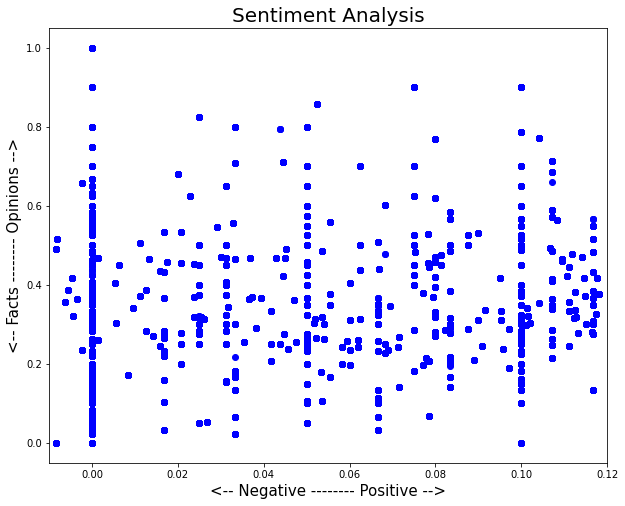

In [106]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index, FM in enumerate(Speech_df.index):
    x = Speech_df.polarity.loc[FM]
    y = Speech_df.subjectivity.loc[FM]
    plt.scatter(x, y, color='blue')
    plt.xlim(-.01, .12) 
        
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()